# Perceptron

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naiwen1997/IDNE-577-Machine-Learning/blob/master/Supervised%20Learning/Parametric%20Modeling/Lecture%201%20Perceptron/Perceptron.ipynb)

In [81]:
# !pip install ucimlrepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# import the dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 

# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features.values
y = rice_cammeo_and_osmancik.data.targets.values

In [82]:
df_var=rice_cammeo_and_osmancik.variables
var_name=df_var['name']

In [83]:
# Convert each entry of y with Cammeo to 1 and otherwise -1, which is the sign function
y=np.where(y=='Cammeo',-1,1)
# Standardize the value of X
X=np.array([X[:,i]/X[:,i].max() for i in range(X.shape[1])]).T
# concatenate X and y
data = np.concatenate((X,y),axis=1)
# generate the Dataframe
df=pd.DataFrame(data,columns=var_name)

In [84]:
print(df)

name      Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     0.805319   0.958306           0.961254           0.791258      0.979826   
1     0.774917   0.901294           0.861971           0.852975      0.944513   
2     0.773754   0.913713           0.895805           0.816127      0.962143   
3     0.696664   0.835712           0.808908           0.813152      0.940775   
4     0.776609   0.924735           0.885917           0.830486      0.956418   
...        ...        ...                ...                ...           ...   
3805  0.604928   0.758248           0.713302           0.797421      0.911682   
3806  0.614657   0.768335           0.701705           0.831881      0.892240   
3807  0.657590   0.806823           0.768054           0.807142      0.929470   
3808  0.522498   0.715288           0.674422           0.727252      0.922363   
3809  0.604558   0.737921           0.673942           0.844952      0.870977   

name  Convex_Area    Extent

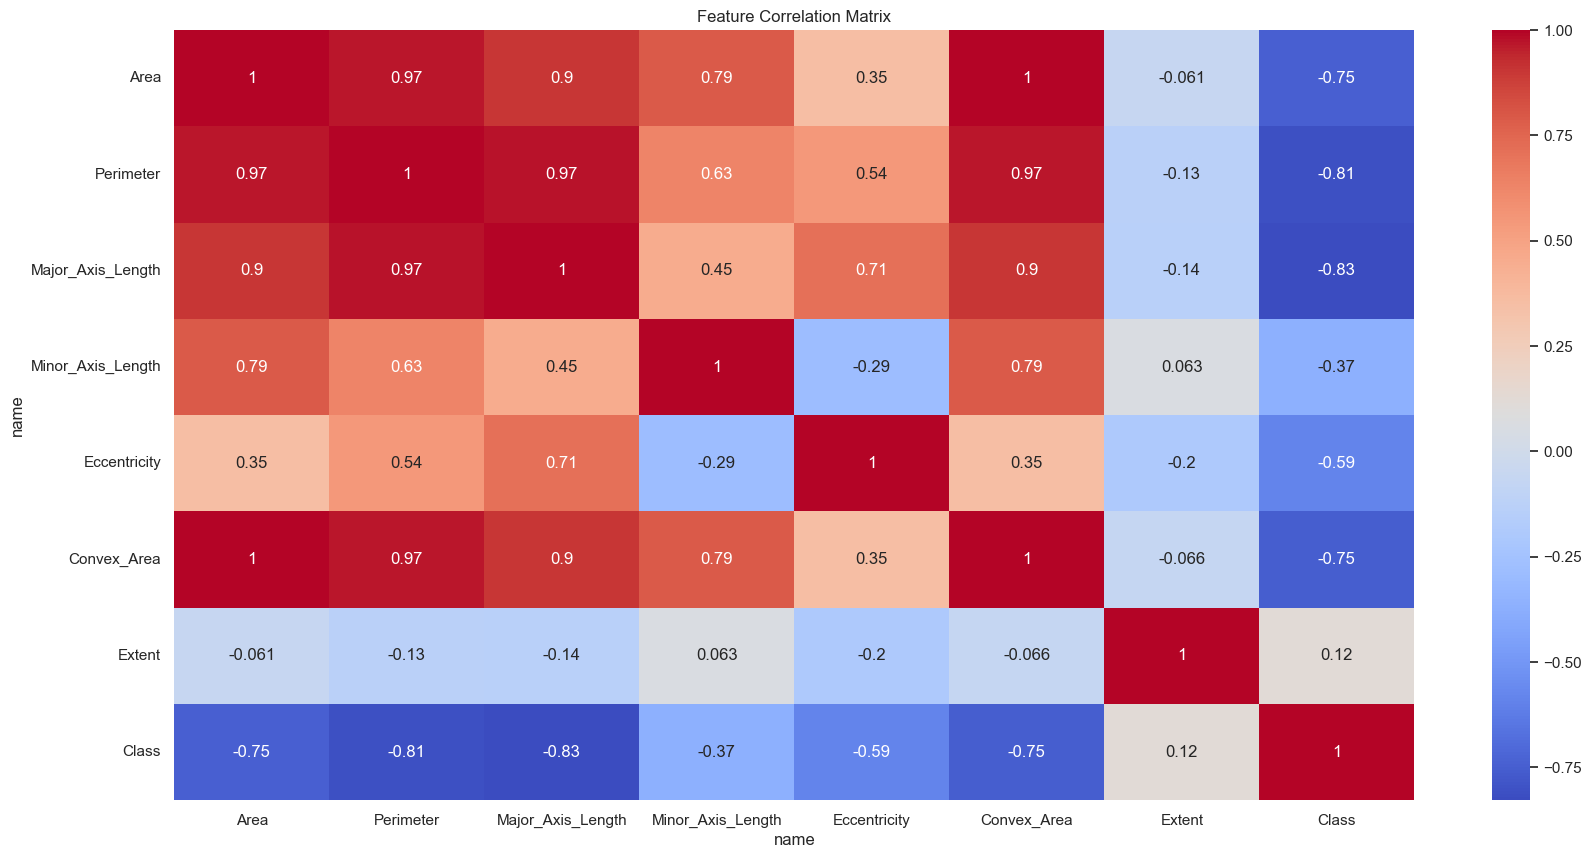

In [106]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

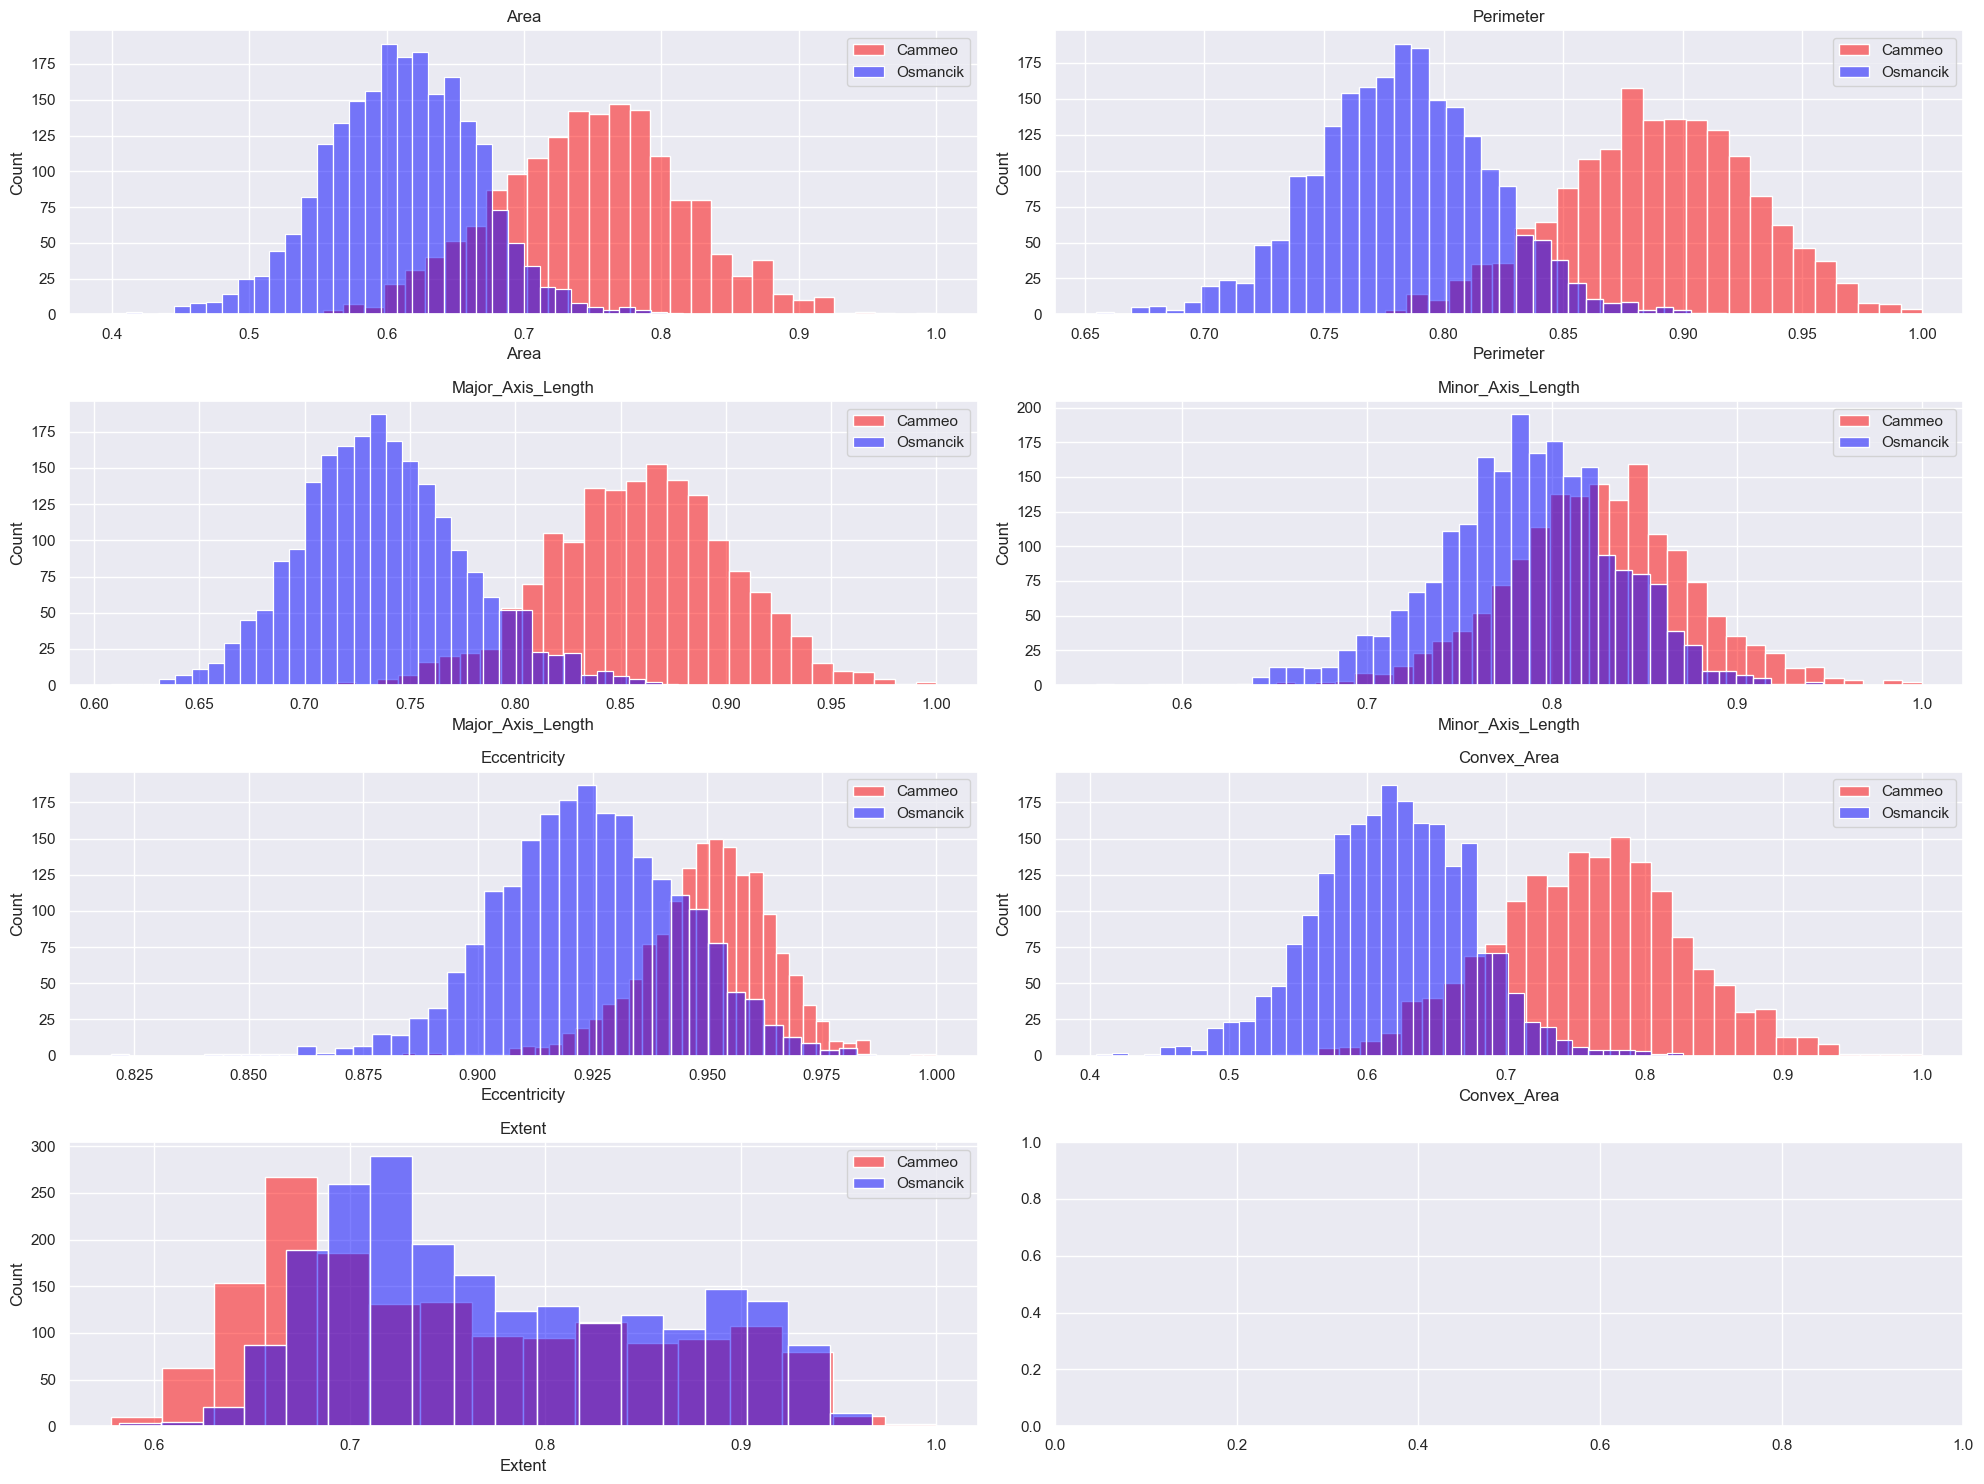

In [86]:
# Create the filtering condition for Class
filter=(df['Class']==-1)

fig, axs = plt.subplots(4, 2, figsize=(20, 15))
axs = axs.flatten()

for i in range(X.shape[1]):
    sns.histplot(data=df.loc[filter,var_name[i]], ax=axs[i], color="red", alpha=0.5)
    sns.histplot(data=df.loc[~filter,var_name[i]], ax=axs[i], color="blue", alpha=0.5)
    axs[i].set_title(var_name[i])
    axs[i].legend(['Cammeo', 'Osmancik'])

fig.tight_layout()
plt.show()

The histograms show that some the overlap between the two classes is very high for some features (e.g. Minor_Axis_Length, Extent) and is very low for some other features (e.g. Major_Axis_Length)

In [95]:
# get the feature names
var_name.values

array(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'], dtype=object)

In [96]:
# We exclude Minor_Axis_Length, Eccentricity and Extent from features since the high overlapping
X=df[['Area', 'Perimeter', 'Major_Axis_Length', 'Convex_Area']].values


In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Define the Perceptron class
class Perceptron:
    """
    A class to represent a Perceptron model.

    Attributes
    ----------
    learning_rate : float, default=0.01
        The learning rate of the model.
    epochs : int, default=1000
        The number of iterations to train the model.

    Methods
    -------
    train(X, y):
        Trains the model on the given input data and target labels.
    predict(X):
        Predicts the output for the given input data.
    """

    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Constructs all the necessary attributes for the Perceptron object.

        Parameters
        ----------
        learning_rate : float, default=0.01
            The learning rate of the model.
        epochs : int, default=1000
            The number of iterations to train the model.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def train(self, X, y):
        """
        Trains the Perceptron model on the given input data and target labels.

        Parameters
        ----------
        X : numpy.ndarray of shape (n_samples, n_features)
            The input data to train the model on.
        y : numpy.ndarray of shape (n_samples,)
            The target labels for the input data.

        Returns
        -------
        self : object
            Returns self.
        """
        # Initialize weights and bias to zeros
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        # Update weights and bias
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def predict(self, X):
        """
        Predicts the output for the given input data.

        Parameters
        ----------
        X : numpy.ndarray of shape (n_samples, n_features)
            The input data to predict the output for.

        Returns
        -------
        int
            The predicted output for the given input data.
        """

        # Compute the linear combination of inputs and weights
        z = np.dot(X, self.w_[:-1]) + self.w_[-1]
        
        # Apply the step function to the linear combination
        if z > 0:
            return 1
        else:
            return -1


In [100]:
model=Perceptron(learning_rate=0.5)
model.train(X_train,y_train)

In [101]:
# Make predictions on the testing data and compute the accuracy
y_pred = [model.predict(X_test[i]) for i in range(X_test.shape[0])] 
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9225721784776902


In [102]:
print(y_test == y_pred)

[[ True False False ... False  True  True]
 [False  True  True ...  True False False]
 [False  True  True ...  True False False]
 ...
 [False  True  True ...  True False False]
 [ True False False ... False  True  True]
 [ True False False ... False  True  True]]


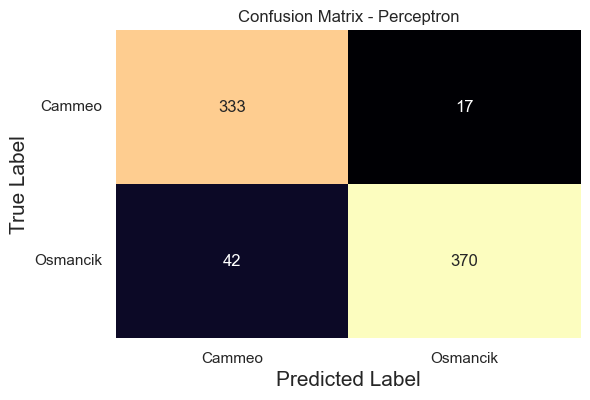

In [103]:
# Import metrics from sklearn 
from sklearn import metrics

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)
ax.set_title("Confusion Matrix - Perceptron")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_ylabel("True Label", fontsize=15)
ax.set_xticklabels(['Cammeo', 'Osmancik'])
ax.set_yticklabels(['Cammeo', 'Osmancik'], rotation=0)
plt.show()

In [104]:
# check the model performance from the classfication report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.95      0.89      0.92       375
           1       0.90      0.96      0.93       387

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



# Conclusion